<IPython.core.display.Javascript object>


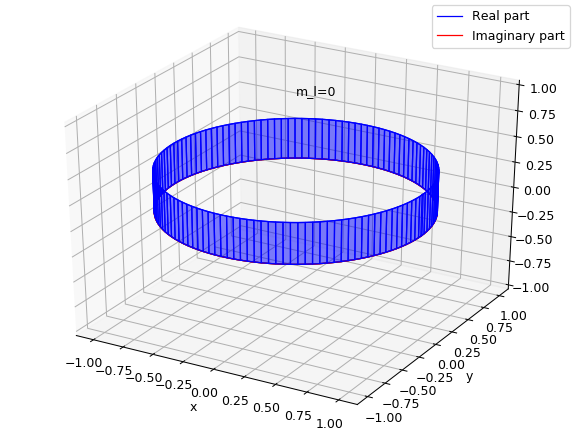

interactive(children=(IntSlider(value=1, description='ml', max=5, min=-5), Output()), _dom_classes=('widget-in…

In [6]:
from pylab import *
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib notebook

#initial values
ml0=1

#create data
step = 0.05
r = arange(0, 2*pi+step, step)
x = cos(r)
y = sin(r)
ring_z = 0 * r
def psi_real(r, ml):
    return sqrt(1/(2*pi))*cos(ml*r)
def psi_imag(r, ml):
    return sqrt(1/(2*pi))*sin(ml*r)
z_real = psi_real(r, ml0)
z_imag = psi_imag(r, ml0)

#utility function for prettier plot
def make_surface(xs, ys, zs, base, color):
    v = []
    for k in range(0, len(xs) - 1):
        x = [xs[k], xs[k+1], xs[k+1], xs[k]]
        y = [ys[k], ys[k+1], ys[k+1], ys[k]]
        z = [zs[k], zs[k+1],    base, base]
        v.append(list(zip(x, y, z)))
    c = Poly3DCollection(v)
    c.set_edgecolor(color)
    col = (color[0], color[1], color[2], 0.5)
    c.set_facecolor(col)
    c.set_alpha(0.5)
    return c


#create plot
fig = figure()
ax = Axes3D(fig)
plot_ring = ax.plot(x, y, ring_z, linewidth=1, color='black')
plot_real_line, = ax.plot(x, y, z_real, linewidth=1, color='blue', label='Real part')
plot_imag_line, = ax.plot(x, y, z_imag, linewidth=1, color='red', label='Imaginary part')
plot_real_face = ax.add_collection3d(make_surface(x, y, z_real, 0, (0.0, 0.0, 1.0)))
plot_real_face = ax.add_collection3d(make_surface(x, y, z_imag, 0, (1.0, 0.0, 0.0)))
ax.set_zlim([-1, 1])
t = ax.text(0, 0, 1.1, 'm_l='+str(ml0))
xlabel('x')
ylabel('y')
l=ax.legend()
                      
@interact(ml=(-5,5))
def update(ml=ml0):
    global ax, fig
    ax.remove()
    ax = Axes3D(fig)
    z_real = psi_real(r, ml)
    z_imag = psi_imag(r, ml)
    plot_ring = ax.plot(x, y, ring_z, linewidth=1, color='black')
    plot_real_line, = ax.plot(x, y, z_real, linewidth=1, color='blue', label='Real part')
    plot_imag_line, = ax.plot(x, y, z_imag, linewidth=1, color='red', label='Imaginary part')
    plot_real_face = ax.add_collection3d(make_surface(x, y, z_real, 0, (0.0, 0.0, 1.0)))
    plot_real_face = ax.add_collection3d(make_surface(x, y, z_imag, 0, (1.0, 0.0, 0.0)))
    ax.set_zlim([-1, 1])
    t = ax.text(0, 0, 1.1, 'm_l='+str(ml))
    xlabel('x')
    ylabel('y')
    l=ax.legend()
    draw()